In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

### Read values for 1m for all the ESPs and calculate A

In [2]:
# generic function
def readespfile(filename):
    file = open(filename, "r")
    count = 0
    data = []
    avs = []
    for line in file.readlines():
        if count % 2 == 0:
            avs.append(float((line.split(" ")[1])))
        else :
            data.append(int((line.split(" ")[1])))
        count += 1
    
    return (data, avs)


In [3]:
esp1_1m, esp1_1m_av = readespfile("calibration_1m_esp1.txt")
esp2_1m, esp2_1m_av = readespfile("calibration_1m_esp2.txt")
esp3_1m, esp3_1m_av = readespfile("calibration_1m_esp3.txt")

In [4]:
#Store the final data of averages as A

A_esp1 = esp1_1m_av[-1]
A_esp2 = esp2_1m_av[-1]
A_esp3 = esp3_1m_av[-1]

print("{}, {}, {}".format(A_esp1, A_esp2, A_esp3))

-60.77777777777778, -58.607142857142854, -58.46153846153846


### Free Space Model

In [5]:
# extension on the general function so that it can parse data for 3 esps from same file

# generic function
def readespfile_all(filename):
    file = open(filename, "r")
    count = 0
    data = [[], [], []] 
    avs = [[], [], []]
    for line in file.readlines():
        splitdata = line.split(" ")
        esp = 0
        if count % 2 == 0:
            if splitdata[0] == "esp1rssi":
                esp = 1
            elif splitdata[0] == "esp2rssi":
                esp = 2
            elif splitdata[0] == "esp3rssi":
                esp = 3
            avs[esp-1].append(float(splitdata[1]))   
        else :
            if splitdata[0] == "esp1:":
                esp = 1
            elif splitdata[0] == "esp2:":
                esp = 2
            elif splitdata[0] == "esp3:":
                esp = 3
            data[esp-1].append(int(splitdata[1]))
        count += 1
    
    return (data, avs)

In [6]:
espdatas = {}

def getespdata(distances):
    espdatas[distances] = readespfile_all(distances + ".txt") 


In [7]:
n = 2

# in format [RSSi, calculated, actual]
esp1_data = []
esp2_data = []
esp3_data = []

# Free space model
def dist(A, RSSI):
    return 10**((A-RSSI)/(10*n))

def getdistances(datas):
    getespdata(datas)

    actual_d = datas.split("x")

    esp1av = espdatas[datas][1][0][-1]
    esp2av = espdatas[datas][1][1][-1]
    esp3av = espdatas[datas][1][2][-1]

    esp1_d = dist(A_esp1, esp1av)
    esp2_d = dist(A_esp2, esp2av)
    esp3_d = dist(A_esp3, esp3av)

    if [esp1av, esp1_d, float(actual_d[0])] not in esp1_data:
        esp1_data.append([esp1av, esp1_d, float(actual_d[0])])
    
    if [esp2av, esp2_d, float(actual_d[1])] not in esp2_data:
        esp2_data.append([esp2av, esp2_d, float(actual_d[1])])

    if [[esp3av, esp3_d, float(actual_d[2])]] not in esp3_data:    
        esp3_data.append([esp3av, esp3_d, float(actual_d[2])])

    return (esp1_d, esp2_d, esp3_d)


In [8]:
getdistances("0.22x3.3x3.38")

FileNotFoundError: [Errno 2] No such file or directory: '0.22x3.3x3.38.txt'

In [ ]:
getdistances("7.1x5.53x3.54")

(4.074246314125243, 5.631125909655043, 3.050215223775346)

In [ ]:
getdistances("1.45x2.24x2.32")

(3.378766425095791, 2.6645071079277995, 4.068939349795202)

In [ ]:
getdistances("1.83x2.96x1.74")

(1.6511167294275908, 2.101490700588384, 2.0692452446297778)

In [ ]:
getdistances("1.95x2.04x4.87")

(2.2491592272510856, 2.150123322171689, 3.9443068695845933)

In [ ]:
getdistances("2.38x4.71x2.78")

(1.7444826989992543, 10.462677939546168, 2.316984224903685)

In [ ]:
getdistances("2.84x2.74x5.09")

(1.202703930192356, 3.33940968808814, 3.89913274371174)

In [ ]:
getdistances("3.08x3.23x0.52")

(1.133164418838601, 5.8139386321294975, 0.7752166233340911)

In [ ]:
getdistances("3.27x0.09x3.42")

(0.8722813070352142, 0.05486377848437107, 2.1410498576370642)

In [ ]:
getdistances("3.59x5.3x2.6")

(2.5628911341897362, 3.46451827983309, 6.291312512866314)

In [ ]:
getdistances("4.59x2.37x2.18")

(2.005799790887667, 11.533219283832945, 0.9139513463064872)

In [ ]:
getdistances("6.44x3.24x6.31")

(5.313697479011474, 5.708013116403511, 11.522280977398216)

In [ ]:
getdistances("7.1x5.53x3.54")

(4.074246314125243, 5.631125909655043, 3.050215223775346)

In [ ]:
getdistances("9.25x7.37x5.95")

(2.9417862322691164, 12.333076591083824, 1.7589618098196327)

In [ ]:
getdistances("10.12x6.85x8.74")

(3.341706119501423, 12.063158634104669, 12.632359611041865)

In [ ]:
getdistances("2x2x2")

(3.8336380872014706, 0.9369710887601186, 3.6503940139212236)

In [ ]:
esp1_data

[[-39.7, 0.08833058589461075, 0.22],
 [-72.97872340425532, 4.074246314125243, 7.1],
 [-71.3529411764706, 3.378766425095791, 1.45],
 [-65.13333333333334, 1.6511167294275908, 1.83],
 [-67.81818181818181, 2.2491592272510856, 1.95],
 [-65.61111111111111, 1.7444826989992543, 2.38],
 [-62.38095238095238, 1.202703930192356, 2.84],
 [-61.86363636363637, 1.133164418838601, 3.08],
 [-59.59090909090909, 0.8722813070352142, 3.27],
 [-68.95238095238095, 2.5628911341897362, 3.59],
 [-66.82352941176471, 2.005799790887667, 4.59],
 [-75.28571428571429, 5.313697479011474, 6.44],
 [-70.15, 2.9417862322691164, 9.25],
 [-71.25714285714285, 3.341706119501423, 10.12],
 [-72.45, 3.8336380872014706, 2.0]]

In [ ]:
esp2_data

[[-60.2, 1.201276156684548, 3.3],
 [-73.61904761904762, 5.631125909655043, 5.53],
 [-67.11948051948052, 2.6645071079277995, 2.24],
 [-65.0576923076923, 2.101490700588384, 2.96],
 [-65.25641025641026, 2.150123322171689, 2.04],
 [-79.0, 10.462677939546168, 4.71],
 [-69.08053691275168, 3.33940968808814, 2.74],
 [-73.89655172413794, 5.8139386321294975, 3.23],
 [-33.392857142857146, 0.05486377848437107, 0.09],
 [-69.4, 3.46451827983309, 5.3],
 [-79.84615384615384, 11.533219283832945, 2.37],
 [-73.73684210526316, 5.708013116403511, 3.24],
 [-80.42857142857143, 12.333076591083824, 7.37],
 [-80.23636363636363, 12.063158634104669, 6.85],
 [-58.041666666666664, 0.9369710887601186, 2.0]]

In [ ]:
esp3_data

[[-78.23529411764706, 9.742889630653707, 3.38],
 [-68.14814814814815, 3.050215223775346, 3.54],
 [-70.65116279069767, 4.068939349795202, 2.32],
 [-64.77777777777777, 2.0692452446297778, 1.74],
 [-70.38095238095238, 3.9443068695845933, 4.87],
 [-65.76, 2.316984224903685, 2.78],
 [-65.76, 2.316984224903685, 2.78],
 [-70.28089887640449, 3.89913274371174, 5.09],
 [-56.25, 0.7752166233340911, 0.52],
 [-65.07407407407408, 2.1410498576370642, 3.42],
 [-74.43636363636364, 6.291312512866314, 2.6],
 [-57.68, 0.9139513463064872, 2.18],
 [-79.6923076923077, 11.522280977398216, 6.31],
 [-68.14814814814815, 3.050215223775346, 3.54],
 [-63.36666666666667, 1.7589618098196327, 5.95],
 [-80.49122807017544, 12.632359611041865, 8.74],
 [-69.70833333333333, 3.6503940139212236, 2.0]]

### Plots of actual distance vs calculated distance

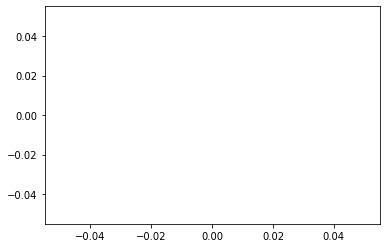

In [10]:
# Actual vs calculated for ESP1

RSSI1 = [dat[0] for dat in esp1_data]
actual1 = [dat[2] for dat in esp1_data]
calc1 = [dat[1] for dat in esp1_data]

plt.plot(RSSI1, actual1, 'rx')
plt.plot(RSSI1, calc1, 'bo')
plt.show()

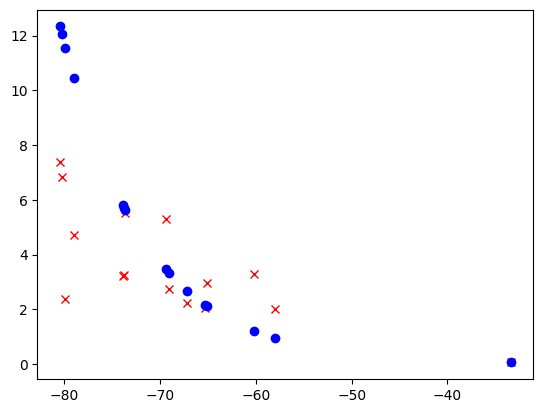

In [ ]:
# Actual vs calculated for ESP2

RSSI2 = [dat[0] for dat in esp2_data]
actual2 = [dat[2] for dat in esp2_data]
calc2 = [dat[1] for dat in esp2_data]

plt.plot(RSSI2, actual2, 'rx')
plt.plot(RSSI2, calc2, 'bo')
plt.show()

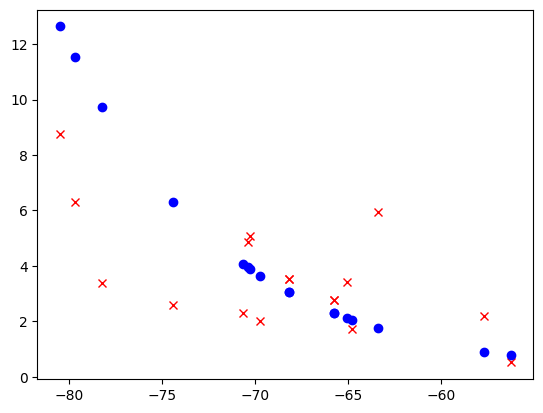

In [ ]:
# Actual vs calculated for ESP3

RSSI3 = [dat[0] for dat in esp3_data]
actual3 = [dat[2] for dat in esp3_data]
calc3 = [dat[1] for dat in esp3_data]

plt.plot(RSSI3, actual3, 'rx')
plt.plot(RSSI3, calc3, 'bo')
plt.show()

### Accuracies

In [ ]:
# Average accuracy

accuracy_esp1 = [abs(actual - calc) for actual,calc in zip(actual1, calc1)]
accuracy_esp2 = [abs(actual - calc) for actual,calc in zip(actual2, calc2)]
accuracy_esp3 = [abs(actual - calc) for actual,calc in zip(actual3, calc3)]

In [ ]:
avg_accuracy_esp1 = sum(accuracy_esp1)/len(accuracy_esp1)
avg_accuracy_esp1

2.1226237999450706

In [ ]:
avg_accuracy_esp2 = sum(accuracy_esp2)/len(accuracy_esp2)
avg_accuracy_esp2

2.4846753480395183

In [ ]:
avg_accuracy_esp3 = sum(accuracy_esp3)/len(accuracy_esp3)
avg_accuracy_esp3

1.9941668493660478

### Plots for recieved data


In [ ]:
def plotrecieved(distance):
    y_axis = espdatas[distance][0][0]
    x_axis = [i+1 for i in range(len(y_axis))]
    y_avg  = [espdatas[distance][1][0][-1] for i in range(len(y_axis))]
    plt.plot(x_axis, y_axis)
    plt.plot(x_axis, y_avg, "--")
    plt.title("ESP 1")
    plt.show()

    y_axis = espdatas[distance][0][1]
    x_axis = [i+1 for i in range(len(y_axis))]
    y_avg  = [espdatas[distance][1][1][-1] for i in range(len(y_axis))]
    plt.plot(x_axis, y_axis)
    plt.plot(x_axis, y_avg, "--")
    plt.title("ESP 2")
    plt.show()

    y_axis = espdatas[distance][0][2]
    x_axis = [i+1 for i in range(len(y_axis))]
    y_avg  = [espdatas[distance][1][2][-1] for i in range(len(y_axis))]
    plt.plot(x_axis, y_axis)
    plt.plot(x_axis, y_avg, "--")
    plt.title("ESP 3")
    plt.show()


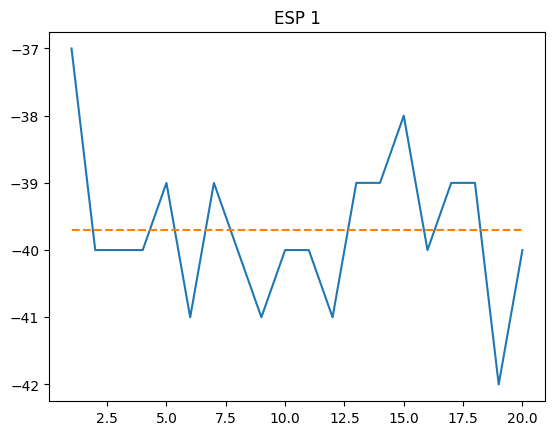

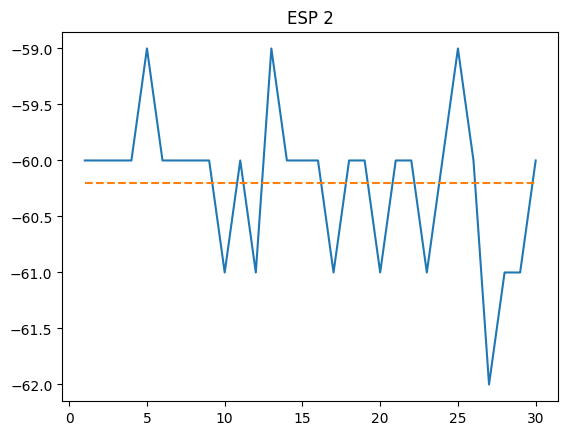

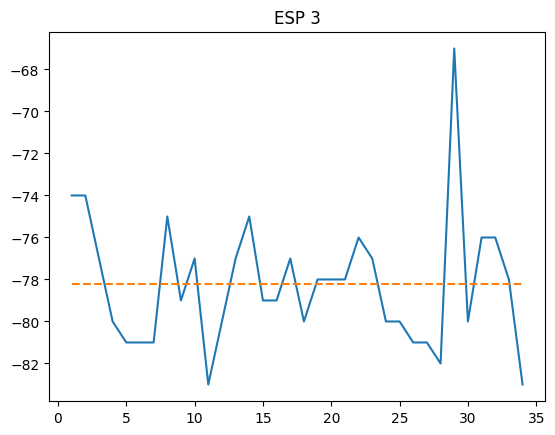

In [ ]:
plotrecieved("0.22x3.3x3.38")

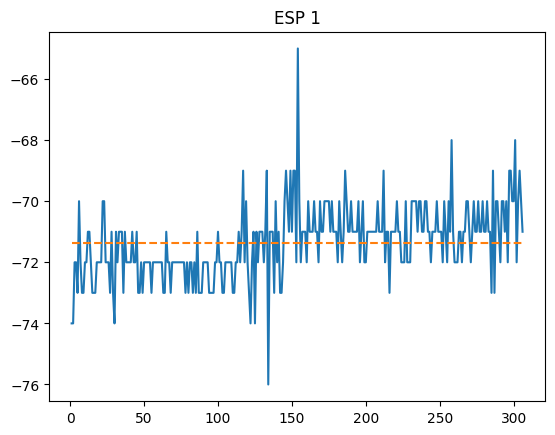

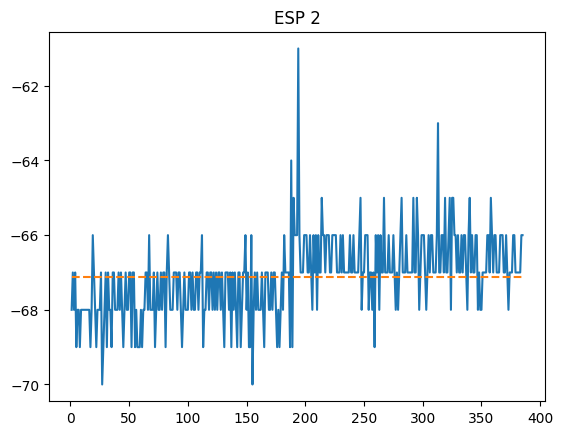

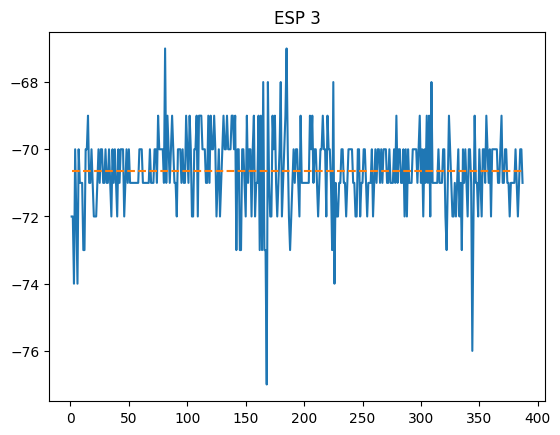

In [ ]:
plotrecieved("1.45x2.24x2.32")

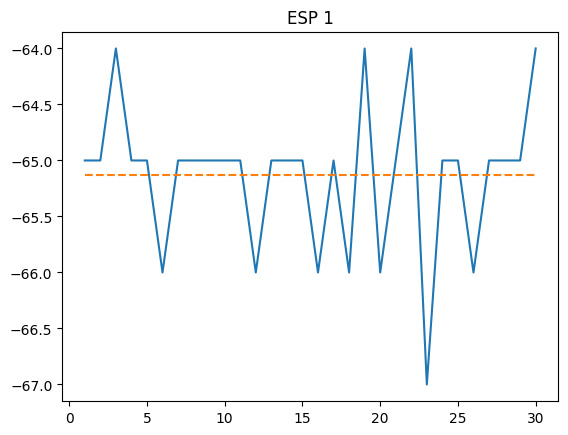

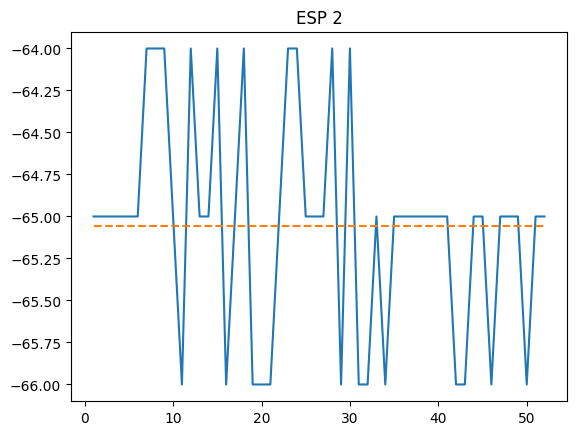

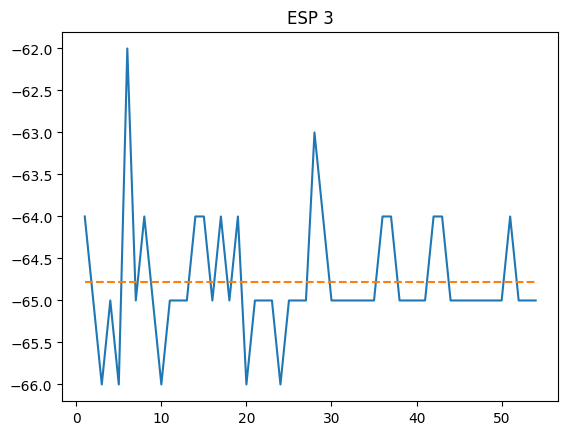

In [ ]:
plotrecieved("1.83x2.96x1.74")

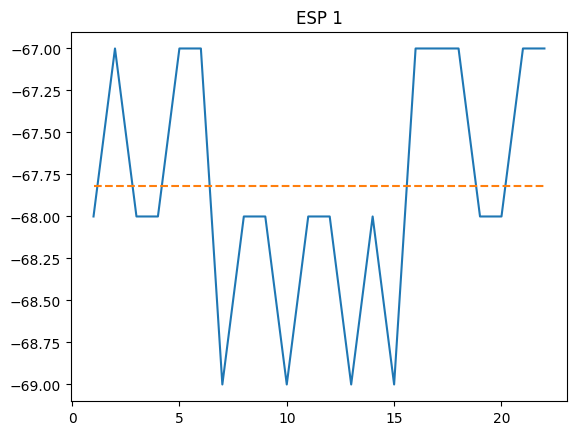

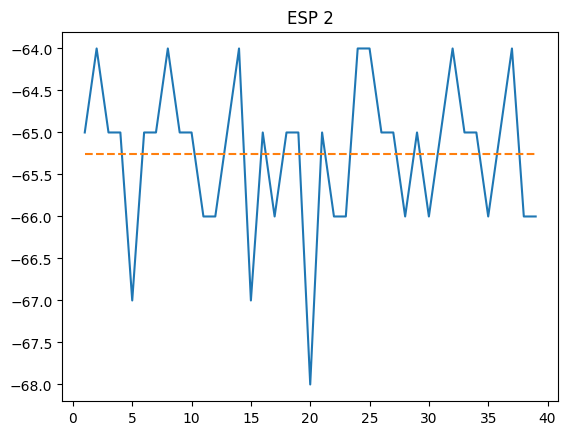

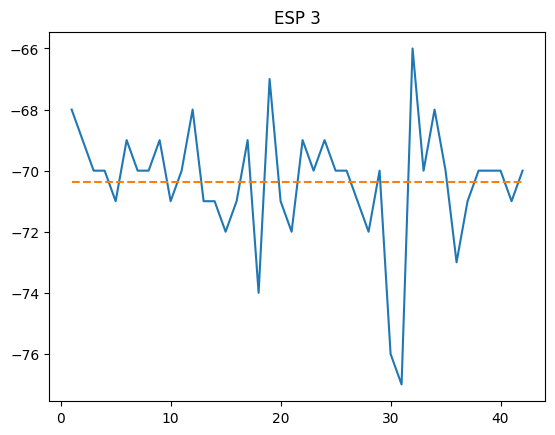

In [ ]:
plotrecieved("1.95x2.04x4.87")

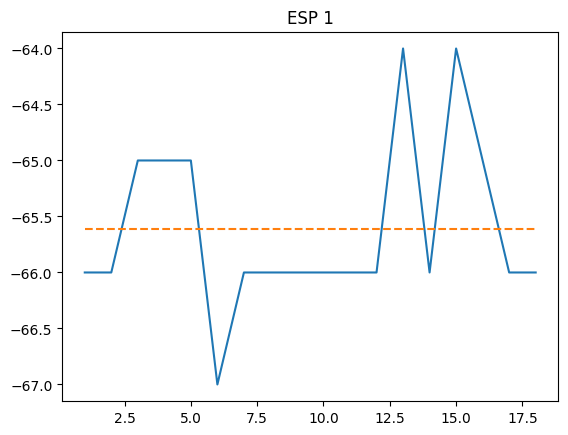

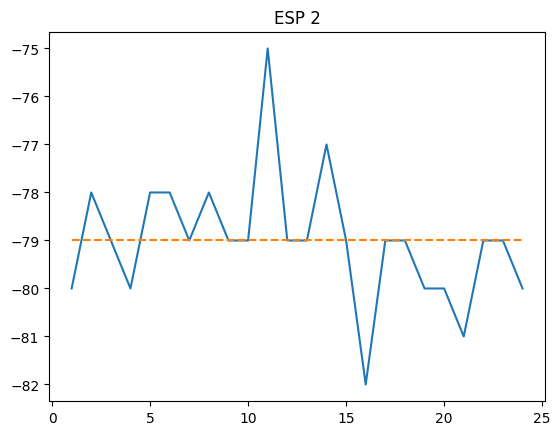

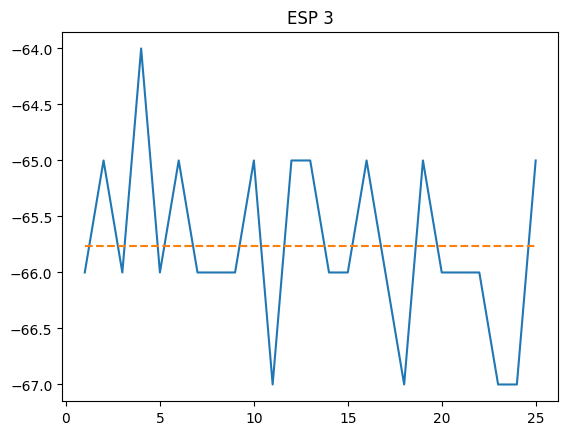

In [ ]:
plotrecieved("2.38x4.71x2.78")

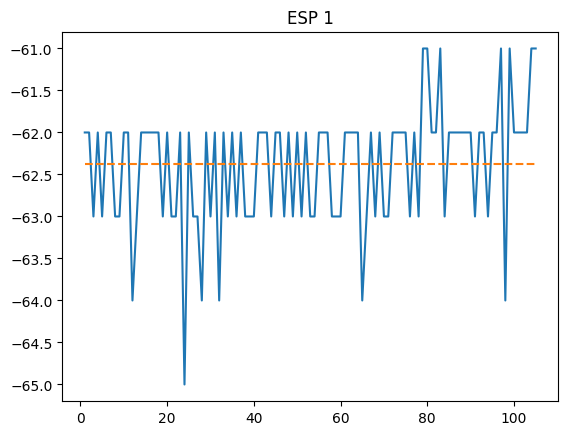

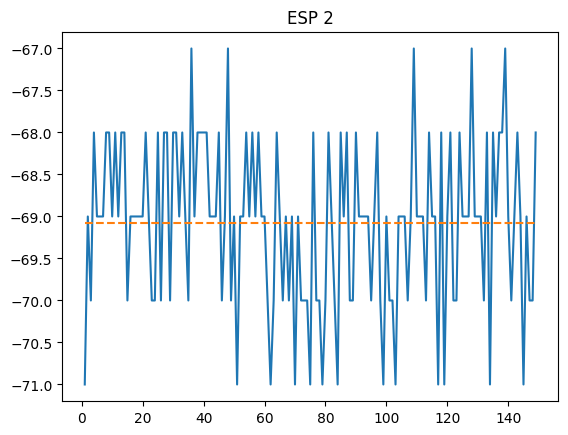

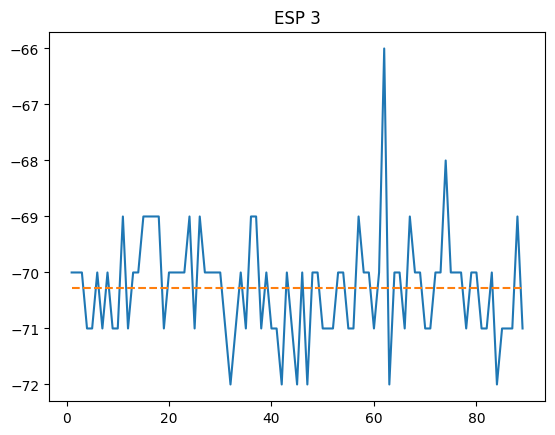

In [ ]:
plotrecieved("2.84x2.74x5.09")

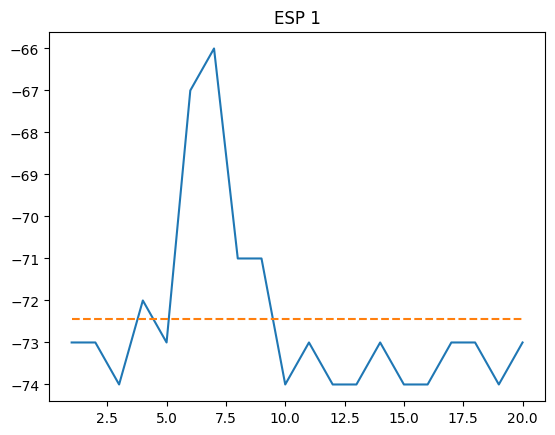

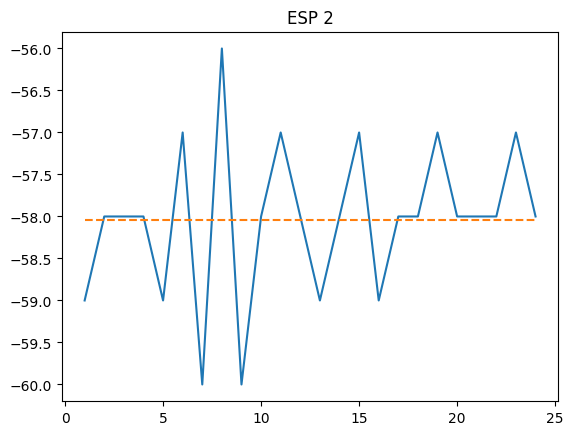

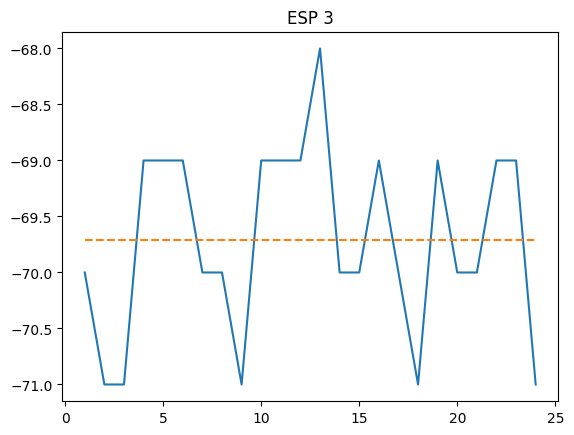

In [ ]:
plotrecieved("2x2x2")

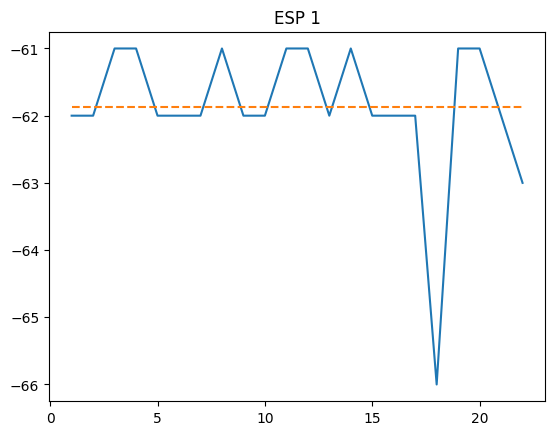

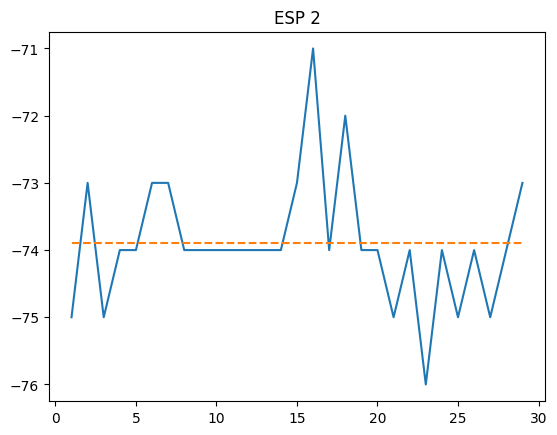

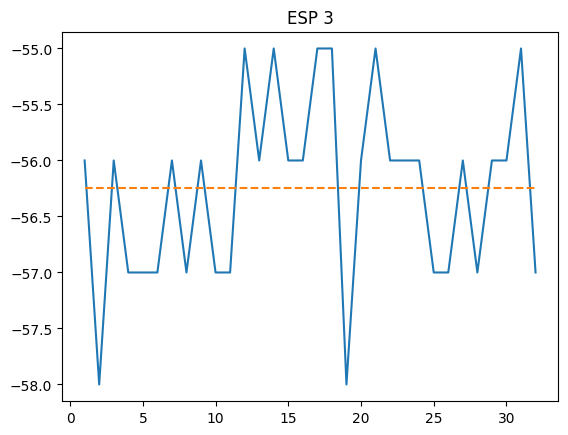

In [ ]:
plotrecieved("3.08x3.23x0.52")

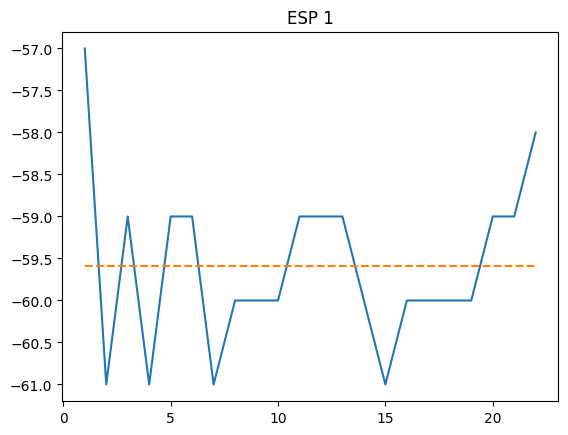

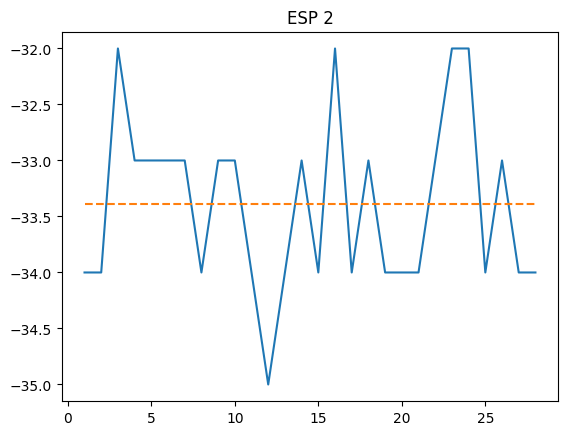

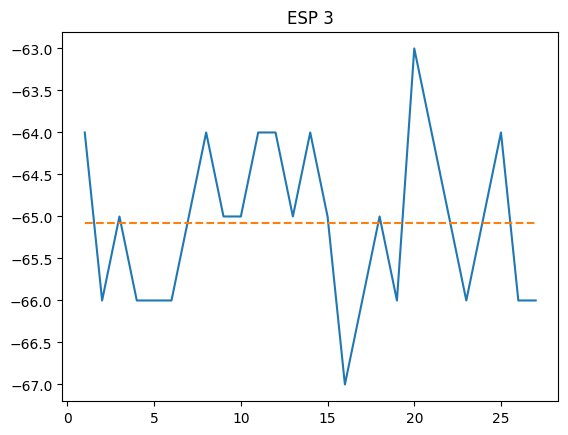

In [ ]:
plotrecieved("3.27x0.09x3.42")

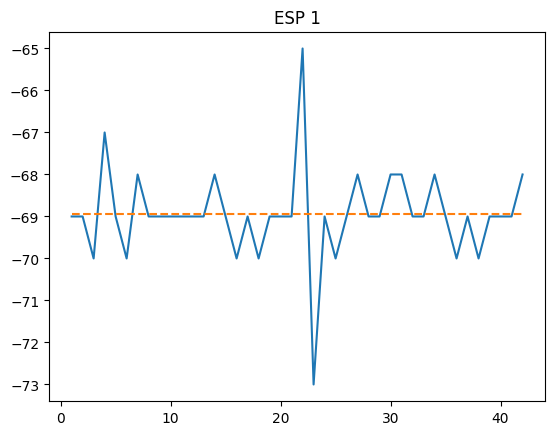

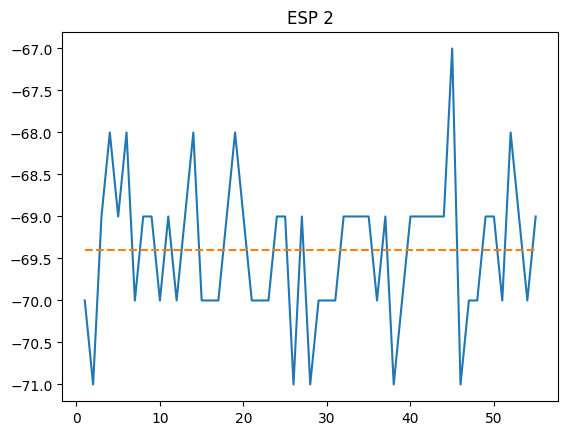

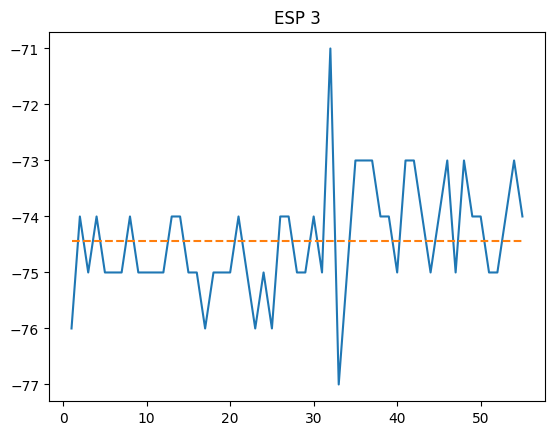

In [ ]:
plotrecieved("3.59x5.3x2.6")

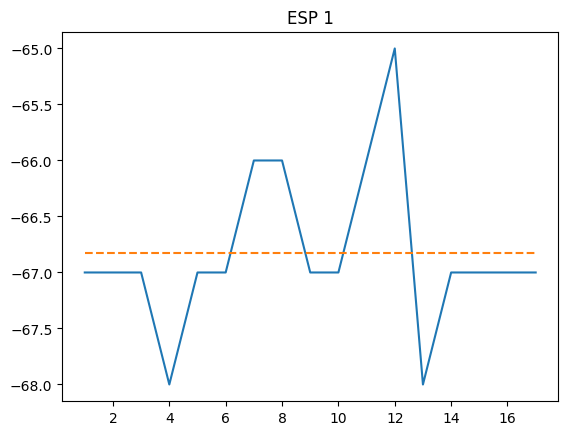

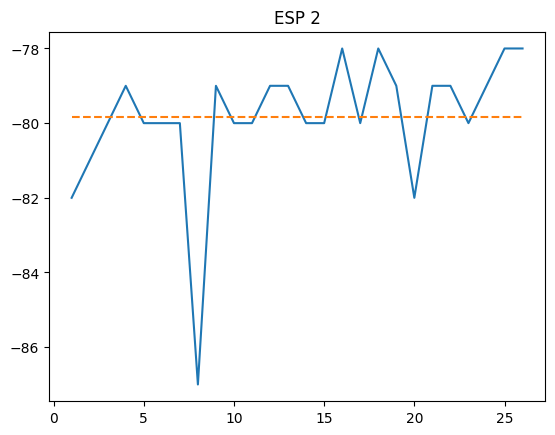

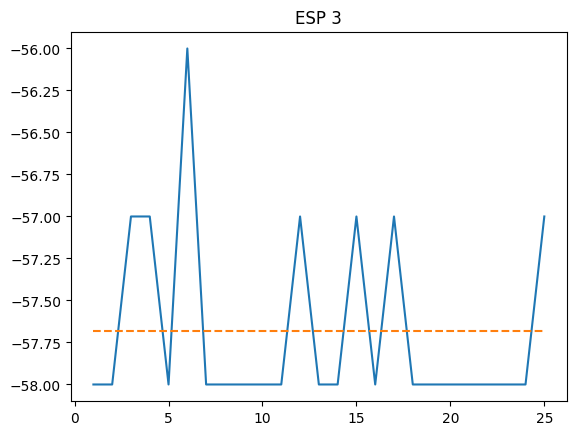

In [ ]:
plotrecieved("4.59x2.37x2.18")